# Week3- Assignment 3a

In [145]:
import pandas as pd
from matplotlib import pyplot as plt 
import pylab as pl
import numpy as np
df = pd.read_csv("data.txt",delimiter=",", header=None)
df.columns=['Population','Profit']
df.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


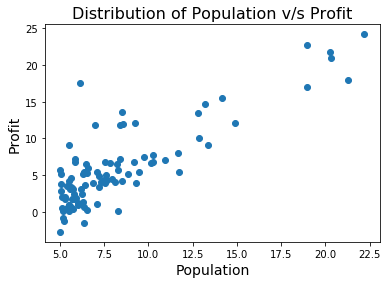

In [146]:
#Plotting the scatter plot of the data

%matplotlib inline
plt.scatter(df['Population'],df['Profit'])
plt.xlabel('Population', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Distribution of Population v/s Profit', fontsize=16)
plt.show()

In [147]:
# The Cost function
def Compute_cost(X, Y, theta):
     J=np.dot((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y))/(2*len(Y))
     return J

In [156]:
# Grad_desc funtion
def Grad_desc(x,y,theta,alpha):
    X = np.c_[np.ones(len(x)),x]
    Y = np.c_[y]
    X_1=np.c_[x].T
    for i in range(10_000):
        a=np.sum(theta[0]- alpha * (1/len(Y)) * np.sum((np.dot(X,theta)- Y)))
        b=np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(np.dot(X_1,(np.dot(X,theta)-Y))))
        theta= np.array([[a],[b]])
    return theta

cost = [[908.90372009]]
theta =  [[-3.98644013]
 [ 1.16338795]]


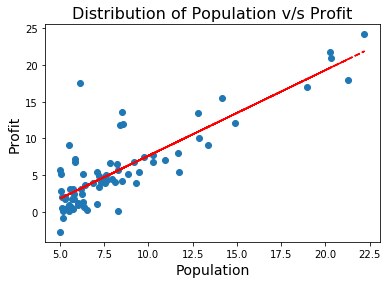

new cost =  [[4.50775864]]
The predicted value for population of 35,000 is  [40714.59171098]
The predicted value for population of 70,000 is  [81433.16986209]


In [157]:
#Separating the data into training and testing sets
msk= np.random.rand(len(df)) <0.80
train = df[msk]
test = df[~msk]

#plotting a scatter plot of the training set
plt.scatter(train['Population'],train['Profit'])
plt.xlabel('Population', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Distribution of Population v/s Profit', fontsize=16)

#calling the cost function
theta=np.array([[3.5,5]]).T
x=np.c_[np.ones(len(train['Population'])),train['Population']]
y=np.c_[train['Profit']]
cost=Compute_cost(x,y,theta)
print('cost =', cost)

#calling the gradient descent function
alpha=0.01
theta= Grad_desc(train['Population'],train['Profit'],theta,alpha)
print('theta = ',theta)

#plotting the best fit line
plt.plot(train['Population'],theta[0] + theta[1]*train['Population'],'r--')
plt.show()

cost=Compute_cost(x,y,theta)
print('new cost = ',cost)

print('The predicted value for population of 35,000 is ',(theta[0] + theta[1]*35000))
print('The predicted value for population of 70,000 is ',(theta[0] + theta[1]*70000))

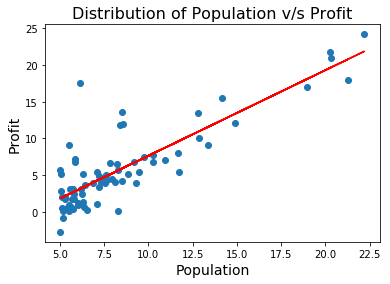

The predicted value for population of 35,000 is  40714.591948589965
The predicted value for population of 70,000 is  81433.17033737795


In [158]:
from sklearn import linear_model as l_mod
Lregr = l_mod.LinearRegression()
train_x = np.asanyarray(train[['Population']])
train_y = np.asanyarray(train[['Profit']])
Lregr.fit(train_x, train_y)
theta=[Lregr.coef_[0][0],Lregr.intercept_[0]]
# print(theta)

plt.scatter(train['Population'],train['Profit'])
plt.plot(train_x, Lregr.coef_[0][0]*train_x + Lregr.intercept_[0], '-r')
plt.xlabel('Population', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Distribution of Population v/s Profit', fontsize=16)
plt.show()

print('The predicted value for population of 35,000 is ',(theta[1] + theta[0]*35000))
print('The predicted value for population of 70,000 is ',(theta[1] + theta[0]*70000))

On comparing the predicted values, they are similar for both the methods.